In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import glob
import os
import zipfile

zip_files = glob.glob('/content/drive/My Drive/Colab Notebooks/*.zip')

for zip_filename in zip_files:
    dir_name = os.path.splitext(zip_filename)[0]
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        zip_handler = zipfile.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)
    else:
        print("you have already  extracted",dir_name)

you have already  extracted /content/drive/My Drive/Colab Notebooks/train
you have already  extracted /content/drive/My Drive/Colab Notebooks/test


In [3]:
#use this 
%rm -rf /content/train
!unzip "/content/drive/My Drive/Colab Notebooks/train.zip" -d "/content/train"

Archive:  /content/drive/My Drive/Colab Notebooks/train.zip
  inflating: /content/train/Black-grass/0050f38b3.png  
  inflating: /content/train/Black-grass/0183fdf68.png  
  inflating: /content/train/Black-grass/0260cffa8.png  
  inflating: /content/train/Black-grass/05eedce4d.png  
  inflating: /content/train/Black-grass/075d004bc.png  
  inflating: /content/train/Black-grass/078eae073.png  
  inflating: /content/train/Black-grass/082314602.png  
  inflating: /content/train/Black-grass/0ace21089.png  
  inflating: /content/train/Black-grass/0b228a6b8.png  
  inflating: /content/train/Black-grass/0b3e7a7a9.png  
  inflating: /content/train/Black-grass/0bb75ded8.png  
  inflating: /content/train/Black-grass/0be707615.png  
  inflating: /content/train/Black-grass/0c67c3fc3.png  
  inflating: /content/train/Black-grass/0d1a9985f.png  
  inflating: /content/train/Black-grass/0d28c429b.png  
  inflating: /content/train/Black-grass/0d4f74f4a.png  
  inflating: /content/train/Black-grass/0dad

In [4]:
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:

#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "/content/train"

In [6]:

images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

In [7]:
print("totalnumber of images",len(images))
print("totalnumber of classes",len(classes))

totalnumber of images 4750
totalnumber of classes 4750


In [8]:
#RESIZE IMAGES 

def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

In [9]:

#save resized images into images.
images = [resize_images(img) for img in images]

In [10]:
images[0].shape

(256, 256, 3)

In [11]:
#number of images in each class
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Small-flowered Cranesbill images is  -> 496
number of Cleavers images is  -> 287
number of Scentless Mayweed images is  -> 516
number of Sugar beet images is  -> 385
number of Maize images is  -> 221
number of Charlock images is  -> 390
number of Common Chickweed images is  -> 611
number of Shepherds Purse images is  -> 231
number of Loose Silky-bent images is  -> 654
number of Common wheat images is  -> 221
number of Black-grass images is  -> 263
number of Fat Hen images is  -> 475


plot the distrbution of number of images

Text(0.5, 0.98, 'Categorical Plotting')

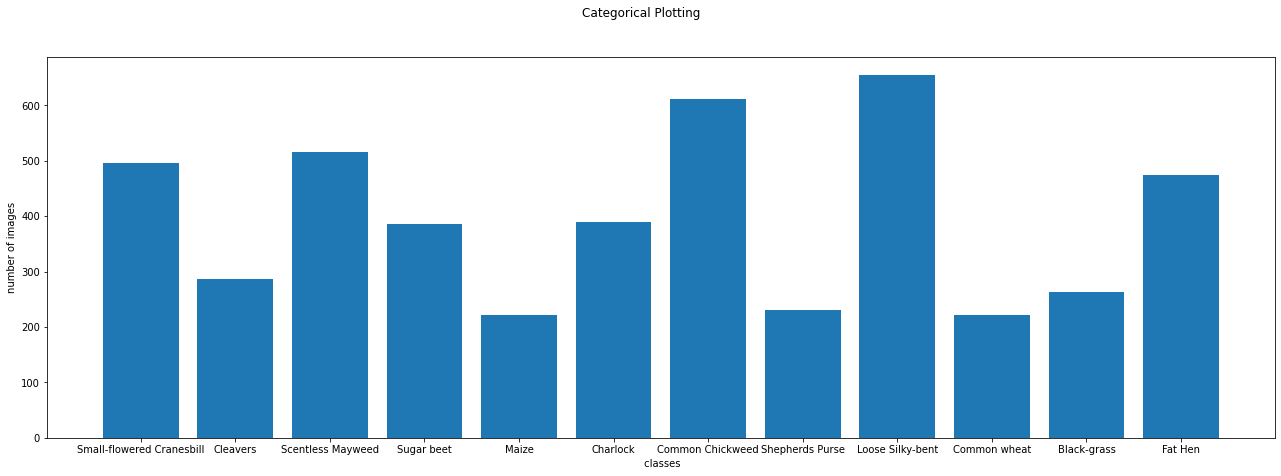

In [12]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

shape is  (256, 256, 3)


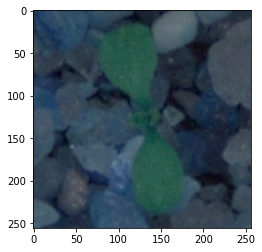

In [13]:
#see one image 

plt.imshow(images[50])
print("shape is ",images[50].shape)

LETS SEE SAMPLE FROM EACH CLASS 

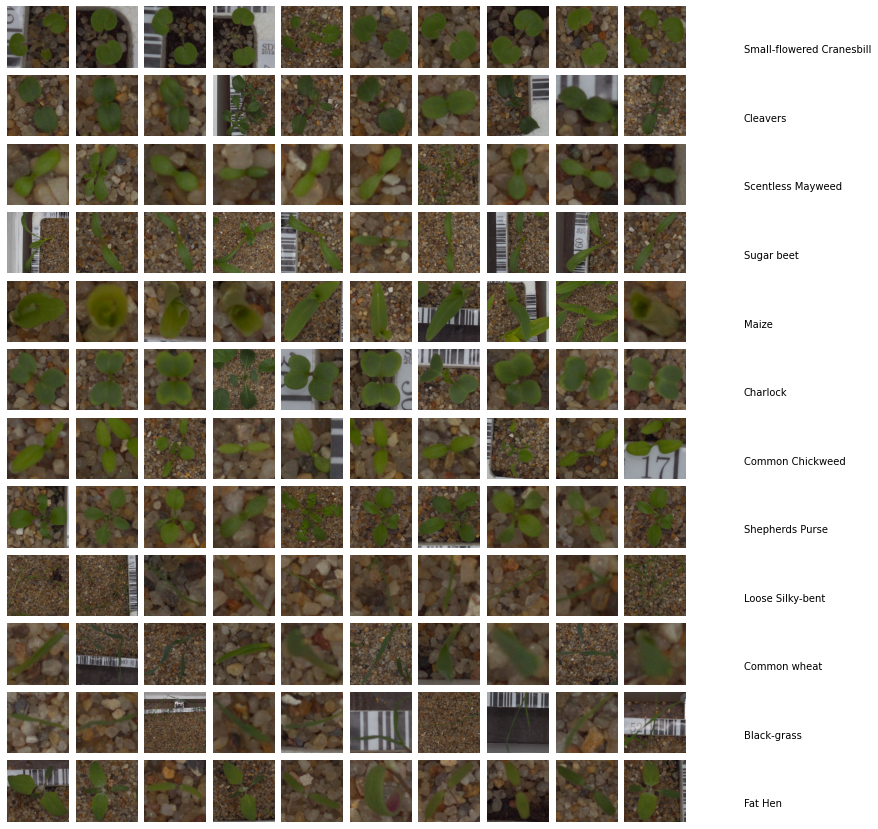

In [14]:
from mpl_toolkits.axes_grid1 import ImageGrid
import glob
fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(labels):
    paths = glob.glob(os.path.join("/content/train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)
    
    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()


In [15]:
# CHANGETHE INPUT IMAGE BY MASKING THEM 
#train_imgs_scaled

# convert image from RGB to HSV
# Apply closing opration(one of mophological opration)
# Apply segmentation
# Apply sharpening

In [16]:

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

#put all together 
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen


In [17]:
#iterate on all images
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue

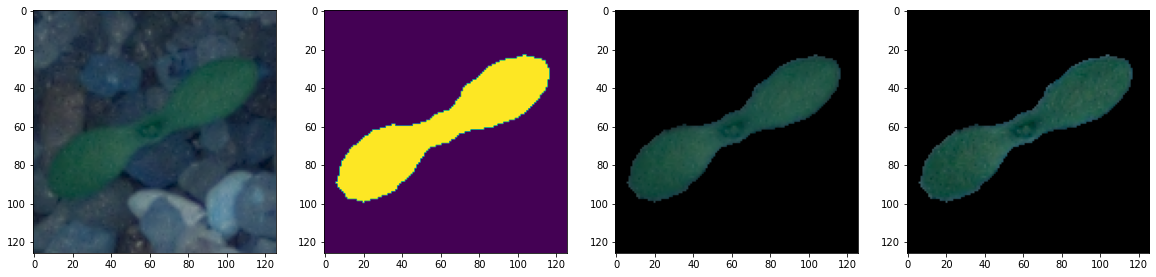

In [18]:
#LETS TRY FORONE IMAGE AND SEE WHAT  HAPPENED AT EACH STAGE
image = cv2.imread("train/Scentless Mayweed/1300c3cd9.png")
image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [19]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Split train and test

In [20]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=random_seed)

Create validarion set¶


In [21]:
#split test data into 50% test, 50% validation

random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(Y_val.shape)

(3325, 256, 256, 3)
(712, 256, 256, 3)
(713, 256, 256, 3)
(3325, 12)
(712, 12)
(713, 12)


#   MODEL 1 : BASIC CNN MODEL

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [24]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/30
104/104 [==============================] - 22s 213ms/step - loss: 2.8472 - accuracy: 0.1311 - val_loss: 2.3514 - val_accuracy: 0.2623
Epoch 2/30
104/104 [==============================] - 20s 194ms/step - loss: 2.3303 - accuracy: 0.1943 - val_loss: 2.1017 - val_accuracy: 0.2623
Epoch 3/30
104/104 [==============================] - 20s 197ms/step - loss: 2.0846 - accuracy: 0.2421 - val_loss: 2.0209 - val_accuracy: 0.2693
Epoch 4/30
104/104 [==============================] - 21s 198ms/step - loss: 2.0113 - accuracy: 0.2617 - val_loss: 2.0301 - val_accuracy: 0.3100
Epoch 5/30
104/104 [==============================] - 21s 200ms/step - loss: 1.8730 - accuracy: 0.3233 - val_loss: 1.9035 - val_accuracy: 0.3534
Epoch 6/30
104/104 [==============================] - 21s 201ms/step - loss: 1.7475 - accuracy: 0.3783 - val_loss: 1.6662 - val_accuracy: 0.5302
Epoch 7/30
104/104 [==============================] - 21s 202ms/step - loss: 1.6085 - accuracy: 0.4358 - val_loss: 1.9161 - val_ac

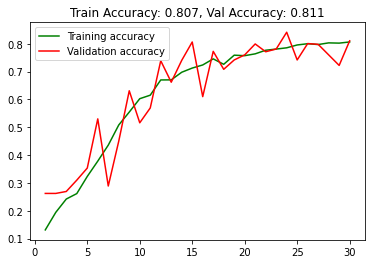

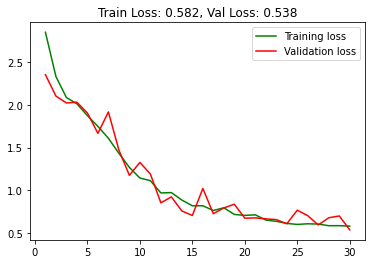

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

# MODEL 2 :CNN WITH DATA AUGMENTATION CALL BACK 

In [27]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
#DATA GENERATOR 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [25]:
# Recall that our dataset is highly imbalanced. We deal with this
# problem by generating class weights and passing them to the model
# at training time. The model will use the class weights to adjust
# how it trains so that each class is considered equally important to
# get right, even if the actual distribution of images is highly 
# variable.
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('/content/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('/content/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}
print(labels_count)
print("Weight of each class is ")
print(class_weights)

{'Shepherds Purse': 231, 'Common Chickweed': 611, 'Common wheat': 221, 'Cleavers': 287, 'Charlock': 390, 'Small-flowered Cranesbill': 496, 'Fat Hen': 475, 'Scentless Mayweed': 516, 'Maize': 221, 'Sugar beet': 385, 'Loose Silky-bent': 654, 'Black-grass': 263}
Weight of each class is 
{0: 20.562770562770563, 1: 7.774140752864157, 2: 21.493212669683256, 3: 16.550522648083625, 4: 12.179487179487179, 5: 9.576612903225806, 6: 10.0, 7: 9.205426356589147, 8: 21.493212669683256, 9: 12.337662337662337, 10: 7.2629969418960245, 11: 18.06083650190114}


In [ ]:
# Recall that our dataset is highly imbalanced. We deal with this
# problem by generating class weights and passing them to the model
# at training time. The model will use the class weights to adjust
# how it trains so that each class is considered equally important to
# get right, even if the actual distribution of images is highly 
# variable.
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('/content/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('/content/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}
print(labels_count)
print("Weight of each class is ")
print(class_weights)

In [30]:
BATCH_SIZE =32
epochs = 15
history = model.fit_generator(datagen.flow(X_train,y_train, BATCH_SIZE),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=len(X_train) // BATCH_SIZE
                              ,class_weight=class_weights, 
                              callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
103/103 - 49s - loss: 10.0691 - accuracy: 0.7470 - val_loss: 0.6496 - val_accuracy: 0.7742
Epoch 2/15
103/103 - 49s - loss: 9.2133 - accuracy: 0.7619 - val_loss: 0.5207 - val_accuracy: 0.8008
Epoch 3/15
103/103 - 49s - loss: 9.1903 - accuracy: 0.7558 - val_loss: 0.5705 - val_accuracy: 0.8022
Epoch 4/15
103/103 - 48s - loss: 9.6200 - accuracy: 0.7604 - val_loss: 0.6277 - val_accuracy: 0.7251
Epoch 5/15
103/103 - 49s - loss: 8.9319 - accuracy: 0.7647 - val_loss: 0.8778 - val_accuracy: 0.6886
Epoch 6/15

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
103/103 - 49s - loss: 9.0036 - accuracy: 0.7683 - val_loss: 0.7189 - val_accuracy: 0.7391
Epoch 7/15
103/103 - 49s - loss: 6.5956 - accuracy: 0.8239 - val_loss: 0.4850 - val_accuracy: 0.8107
Epoch 8/15
103/103 - 49s - loss: 6.2900 - accuracy: 0.8224 - val_loss: 0.4153 - val_accuracy: 0.8583
Epoch 9/15
103/103 - 49s - loss: 6

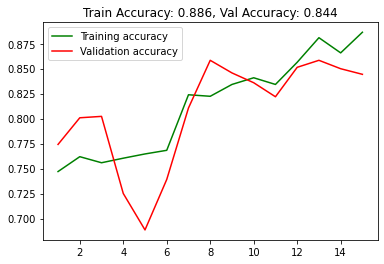

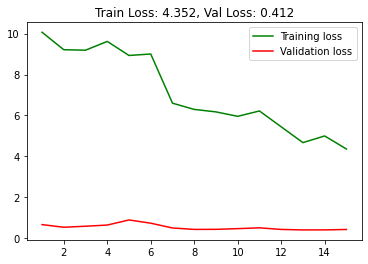

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()


# MODEL 3 VGG 16 PRETRAINED 

In [32]:

#VGG MODEL

from keras.applications import vgg16
from keras.models import Model
import keras
input_shape=(256,256,3)

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_______________________________________________________

In [33]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f286c3c7f28>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f286c3c4ef0>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f28c8e58710>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f286c121518>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f286c180eb8>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f286c078ba8>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f286c0993c8>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f286c0cfac8>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f28c0389518>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f286c0266a0>,block3_conv3,False


In [34]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 32768)             14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                6156      
Total params: 31,761,228
Trainable params: 17,046,540
Non-trainable params: 14,714,688
_________________________________

In [35]:
BATCH_SIZE =32
epochs = 15
history = model.fit_generator(datagen.flow(X_train,y_train, BATCH_SIZE),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=len(X_train) // BATCH_SIZE
                              ,class_weight=class_weights, 
                              callbacks=[learning_rate_reduction])

Epoch 1/15
103/103 - 50s - loss: 51.7245 - accuracy: 0.2193 - val_loss: 1.4833 - val_accuracy: 0.5302
Epoch 2/15
103/103 - 48s - loss: 28.8236 - accuracy: 0.3902 - val_loss: 1.0892 - val_accuracy: 0.6494
Epoch 3/15
103/103 - 49s - loss: 22.4628 - accuracy: 0.4992 - val_loss: 0.8701 - val_accuracy: 0.7321
Epoch 4/15
103/103 - 48s - loss: 18.2589 - accuracy: 0.5831 - val_loss: 0.7284 - val_accuracy: 0.7447
Epoch 5/15
103/103 - 48s - loss: 15.4198 - accuracy: 0.6332 - val_loss: 0.6230 - val_accuracy: 0.7882
Epoch 6/15
103/103 - 48s - loss: 14.4878 - accuracy: 0.6602 - val_loss: 0.5818 - val_accuracy: 0.7966
Epoch 7/15
103/103 - 49s - loss: 12.2418 - accuracy: 0.7045 - val_loss: 0.5421 - val_accuracy: 0.8219
Epoch 8/15
103/103 - 50s - loss: 11.3589 - accuracy: 0.7218 - val_loss: 0.5280 - val_accuracy: 0.8247
Epoch 9/15
103/103 - 48s - loss: 10.5449 - accuracy: 0.7540 - val_loss: 0.5099 - val_accuracy: 0.8289
Epoch 10/15
103/103 - 48s - loss: 9.3088 - accuracy: 0.7853 - val_loss: 0.5379 - v

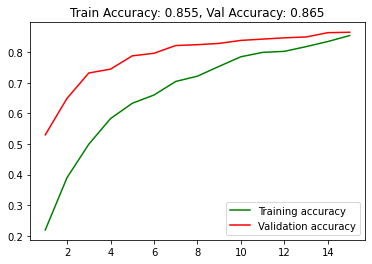

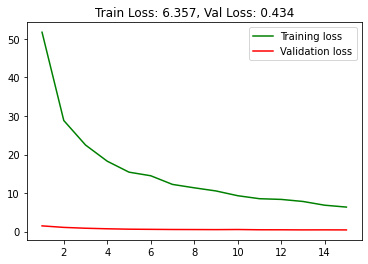

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()


# MODEL 4 :VGG 16 WITH FINE TUNING 

In [29]:
from keras.applications import vgg16
from keras.models import Model
import keras
input_shape=(256,256,3)

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
# vgg_model.trainable = False

# for layer in vgg_model.layers:
#     layer.trainable = False

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [30]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fdba866d908>,input_2,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdba866dac8>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdba866dd68>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdba85e64a8>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdba85e6c88>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdba85e8b00>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdba85e8ba8>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdba85c4748>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdba85d05c0>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdba85d09e8>,block3_conv3,False


In [31]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
input_shape=(256,256,3)
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 32768)             14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                3084      
Total params: 31,626,828
Trainable params: 29,891,340
Non-trainable params: 1,735,488
__________________________________

In [32]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [33]:
#DATA GENERATOR 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [34]:
# Recall that our dataset is highly imbalanced. We deal with this
# problem by generating class weights and passing them to the model
# at training time. The model will use the class weights to adjust
# how it trains so that each class is considered equally important to
# get right, even if the actual distribution of images is highly 
# variable.
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('/content/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('/content/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}
print(labels_count)
print("Weight of each class is ")
print(class_weights)

{'Shepherds Purse': 231, 'Common Chickweed': 611, 'Common wheat': 221, 'Cleavers': 287, 'Charlock': 390, 'Small-flowered Cranesbill': 496, 'Fat Hen': 475, 'Scentless Mayweed': 516, 'Maize': 221, 'Sugar beet': 385, 'Loose Silky-bent': 654, 'Black-grass': 263}
Weight of each class is 
{0: 20.562770562770563, 1: 7.774140752864157, 2: 21.493212669683256, 3: 16.550522648083625, 4: 12.179487179487179, 5: 9.576612903225806, 6: 10.0, 7: 9.205426356589147, 8: 21.493212669683256, 9: 12.337662337662337, 10: 7.2629969418960245, 11: 18.06083650190114}


In [35]:
BATCH_SIZE =32
epochs = 15
history = model.fit_generator(datagen.flow(X_train,y_train, BATCH_SIZE),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=len(X_train) // BATCH_SIZE
                              ,class_weight=class_weights, 
                              callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
103/103 - 53s - loss: 33.9359 - accuracy: 0.1925 - val_loss: 1.8472 - val_accuracy: 0.3198
Epoch 2/15
103/103 - 51s - loss: 23.5551 - accuracy: 0.3756 - val_loss: 1.2065 - val_accuracy: 0.5764
Epoch 3/15
103/103 - 51s - loss: 16.5473 - accuracy: 0.5551 - val_loss: 0.8099 - val_accuracy: 0.7195
Epoch 4/15
103/103 - 51s - loss: 12.0761 - accuracy: 0.6723 - val_loss: 0.4858 - val_accuracy: 0.8261
Epoch 5/15
103/103 - 52s - loss: 9.3140 - accuracy: 0.7601 - val_loss: 0.5315 - val_accuracy: 0.8079
Epoch 6/15
103/103 - 51s - loss: 7.3366 - accuracy: 0.8093 - val_loss: 0.4501 - val_accuracy: 0.8527
Epoch 7/15
103/103 - 51s - loss: 5.9018 - accuracy: 0.8515 - val_loss: 0.3078 - val_accuracy: 0.8808
Epoch 8/15
103/103 - 51s - loss: 4.8780 - accuracy: 0.8813 - val_loss: 1.0047 - val_accuracy: 0.7518
Epoch 9/15
103/103 - 51s - loss: 4.4954 - accuracy: 0.8889 - val_loss: 0.3909 - val_accuracy: 0.8682
Epoch 10/15

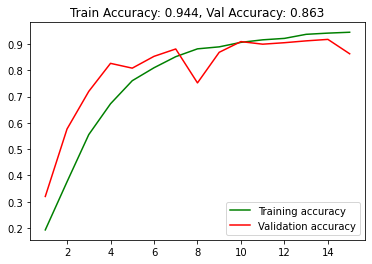

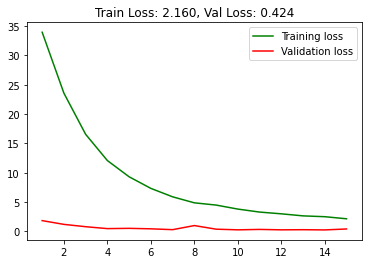

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()
